In [19]:
import causaltensor as ct
import matplotlib.pyplot as plt
import numpy as np

In [20]:
from causaltensor.sample_data import fetch

In [21]:
O_raw = fetch()

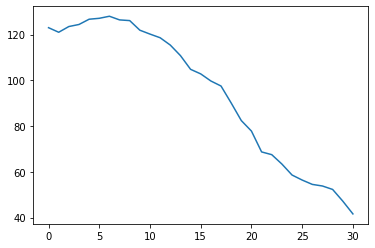

In [22]:
O = O_raw[8:, :]
O = O.T
plt.plot(O[-1, :])

In [23]:
Z = np.zeros_like(O)
Z[-1, 19:] = 1 #start to apply the treatment in 1989

## DID estimation

In [24]:
from causaltensor.cauest import DID 

M, tau = DID(O, Z)

In [25]:
tau

-27.335107556961784

## SDID estimation

In [26]:
from causaltensor.cauest import SDID

tau = SDID(O, Z)

In [27]:
tau

-15.602326126984691

## Matrix Completion

In [10]:
from causaltensor.cauest import MC_NNM_with_suggested_rank

M, a, b, tau = MC_NNM_with_suggested_rank(O, 1-Z, suggest_r = 1)

In [11]:
tau

-27.017712092108127

In [12]:
from causaltensor.cauest import MC_NNM_with_cross_validation

M, a, b, tau = MC_NNM_with_cross_validation(O, 1-Z)
tau

-19.936496012118933

## Debiased Convex Panel Regression

In [16]:
from causaltensor.cauest import DC_PR_with_suggested_rank
from causaltensor.cauest import non_convex_algorithm
from causaltensor.cauest import std_debiased_convex
from causaltensor.cauest import DC_PR_auto_rank




#M, tau, M_raw, tau_raw = DC_PR_with_suggested_rank(O, Z, suggest_r = 2)
M, tau, M_raw, tau_raw = DC_PR_auto_rank(O, Z)
variance = std_debiased_convex(O, Z, M_raw, tau_raw)
print(tau, variance)

-16.010577370659334 3.97343250314268
